# Machine Project 7: Intro to Regression Models

In [1]:
# Add imports used throughout the project here
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Connect to a database using sql
import sqlite3

# import for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


# import for plotting 
import rasterio

# Group Part (75%)

For this portion of the machine project, you may collaborate with your group members in any way (including looking at group members' code). You may also seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** seek or receive help from other CS 320 students (outside of your group) or anybody else outside of the course.

## Part 1: Predicting Population using Area

### Q1: How many counties are in Wisconsin?

Read `counties.geojson` into a GeoDataFrame and use it to calculate the number of counties in Wisconsin.

In [2]:
#Q1
counties = gpd.read_file("counties.geojson")
len(counties)

72

### Q2: What is the population of each county in WI?

Create a geopandas plot that has a legend using the population from
the `POP100` column.

**Important:** Make sure to pass in `ax` as an argument when plotting: `.plot(ax=ax, ...)`

<img src="img/q2.png" width="500">

The US Census Bureau does some surveys that attempt to sample the
population and others (like the decennial one) that attempt to count
everybody.  "POP100" means this is there attempt to count 100% of the
population (no sampling).  Similarly, "HU100" is a 100% count of
housing units.

In [3]:
counties.head()

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.7246 44.3384..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."


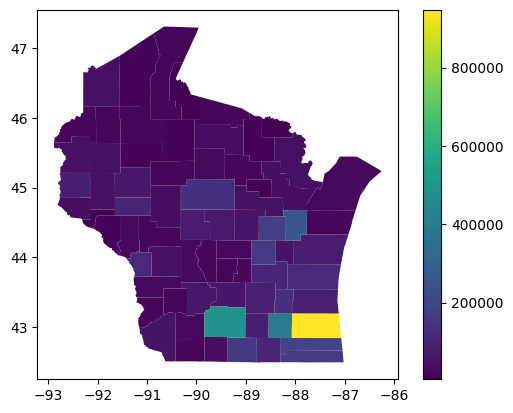

In [4]:
#Q2
fig, ax = plt.subplots()

# PLOT HERE
ax=counties.plot(ax=ax,legend = True,column='POP100')
# IMPORTANT -- Do not remove -- 
with open("Q2.pkl", "wb") as f:
    pickle.dump(fig, f)

### Requirement: Feature 1 - `AREALAND`

Let's add an `AREALAND` column to your GeoDataFrame of counties so
that we can try to predict population based on area.

You can get the area from the `counties_tracts.db` database.  Open it using [sqlite3](https://docs.python.org/3/library/sqlite3.html) then use [read_sql](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) on the DB connection to execute a query.

A great first query for an unfamiliar DB is `pd.read_sql("""SELECT * FROM sqlite_master""", conn)`.  That will show you all the tables the DB has. Try running `pd.read_sql("""SELECT * FROM ????""", conn)` for each table name to see what all the tables look like.

Use data from the database to add an `AREALAND` column to your
GeoDataFrame.  The order of rows in your GeoDataFrame should not
change as part of this operation.

After you've added `AREALAND` to your GeoDataFrame, use
`train_test_split` from `sklearn` to split the rows into `train` and
`test` datasets.

* By default, `train_test_split` randomly shuffles the data differently each time it runs.  Pass `random_state=320` as a parameter so that it shuffles the same way as it did for us (so that you get the answers the tester expects).
* Pass `test_size=0.25` to make the test set be one quarter of the original data and the other three quarters remaining in the training set.


In [5]:
# Feature 1 - AREALAND
conn = sqlite3.connect("counties_tracts.db")
counties['AREALAND'] = pd.read_sql("""SELECT AREALAND FROM counties""", conn)
counties.head()

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.7246 44.3384...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413


In [6]:
train,test=train_test_split(counties,test_size = 0.25,random_state=320)

### Q3: What are the counties in the test dataset?

Answer with a list, in the same order as the names appear in the original DataFrame. 

In [7]:
#Q3
list(test['NAME'])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

### Q4: How much variance in the `POP100` can a `LinearRegression` model explain based only on `AREALAND`?

`fit` the model to your `train` dataset and `score` it on your `test` dataset. 

**Note:** Calling `LinearRegression.score(...)` will, by default return the $r^2$ score: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

In [8]:
#Q4
lm = LinearRegression()
model_q4=lm.fit(train[['AREALAND']],train['POP100'])
model_q4.score(X=test[['AREALAND']],y=test['POP100'])

0.022002661530554857

### Q5: What is the predicted population of a county with 300 square miles of area, according to the model?

Consult the [Census documentation](https://tigerweb.geo.census.gov/tigerwebmain/TIGERweb_attribute_glossary.html) to learn what units the data is in, and do any conversions necessary to answer the question.  Assume there are exactly 2.59 square kilometers per square mile for the purposes of your calculation.

**Note:** Make sure to cast the final answer to a `float`.

In [9]:
model_q4.coef_,model_q4.intercept_

(array([-1.34823808e-05]), np.float64(99492.21381503207))

In [10]:
#Q5
# convert square miles to square kilometers
square_km = 300*2.59*(10**6) 
float(model_q4.predict(pd.DataFrame([square_km])))

/home/chenchenmengmeng/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_351014/2447320418.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(model_q4.predict(pd.DataFrame([square_km])))


89016.40396725974

## Part 2: Predicting Population using Housing Units

You'll need to wait to do the lab before continuing: [Lab 11](../../labs/Lab11/README.md)

### Requirement: Feature 2 - `HU100` (housing units)

Look at the `tracts` table inside `counties_tracts.db` and find the
`HU100` column. Add a `HU100` column to your GeoDataFrame of counties,
similar to how you added `AREALAND`.

**The query to get housing units per county is more complicated than the
one for AREALAND**.  County names are in the `counties` table and
`HU100` values are in the `tracts` table.  Fortunately, both tables
have a `COUNTY` column you can use to combine. Make sure to get the
total number of housing units for each county from the `tracts` table
by summing the housing units in each tract of the county.

**Split your updated GeoDataFrame into a train and test set, the same
way you did previously.**

**Hints**
1. If I have the same column  in two separate tables, I can run the
following SQL to join based on that column:
```
SELECT table1.column1, column2, column3
FROM table1
INNER JOIN table2
ON table1.column1 == table2.column1
```
2. The order of the counties may not be the same from your original DataFrame
and the one you get from this step. Thus, when you merge them together, consider
using the `pd.merge(...)` function with the `on=????` parameter or the `left_on=????`
and `right_on=????` parameters: https://pandas.pydata.org/docs/reference/api/pandas.merge.html.

In [11]:
pd.read_sql("""
select * from tracts
""",conn)

,index,NAME,COUNTY,HU100
0,0,Census Tract 9701.01,085,2760
1,1,Census Tract 9710.01,085,1536
2,2,Census Tract 9706.01,085,1208
3,3,Census Tract 9706.02,085,3136
4,4,Census Tract 4301,131,2144
...,...,...,...,...
1404,1404,Census Tract 14,059,2913
1405,1405,Census Tract 15,059,1550
1406,1406,Census Tract 16,059,1286
1407,1407,Census Tract 17,059,1068


In [12]:
# Feature 2 - HU100
merged_tracts_coutnies = pd.read_sql("""
select counties.NAME, counties.COUNTY,SUM(tracts.HU100) AS 'HU100' from tracts
INNER JOIN counties
on tracts.COUNTY = counties.COUNTY
group by counties.NAME
""",conn)
counties = pd.merge(merged_tracts_coutnies,counties,how = 'right')
counties.head()

,NAME,COUNTY,HU100,POP100,geometry,AREALAND
0,Racine County,101,82164,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,019,15076,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,141,34088,74749,"POLYGON ((-89.72464 44.33712, -89.7246 44.3384...",2054044751
3,Rusk County,107,8883,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,089,36267,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413


### Q6: What are the counties in the test dataset?

Answer with a `list`, in the same order as the names appear in the DataFrame.
Note: Refer to [this link](https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/) to get a brief understanding on how different joins work.


In [13]:
#Q6
train,test = train_test_split(counties,test_size = 0.25,random_state=320)
list(test['NAME'])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

### Q7: What are the HU100 values for the counties in the test dataset?

Answer with a `dict`.

In [14]:
#Q7
{row.NAME: row.HU100 for row in test.itertuples()}

{'Kewaunee County': 9304,
 'Calumet County': 19695,
 'Adams County': 17436,
 'Eau Claire County': 42151,
 'Milwaukee County': 418053,
 'Ashland County': 9656,
 'Wood County': 34088,
 'Dodge County': 37005,
 'Sauk County': 29708,
 'Clark County': 15076,
 'Pepin County': 3579,
 'Taylor County': 10582,
 'Iron County': 5999,
 'Outagamie County': 73149,
 'Florence County': 4780,
 'Oneida County': 30125,
 'Pierce County': 16132,
 'Grant County': 21581}

### Q8: How much variance in the `POP100` can a `LinearRegression` model explain based only on `HU100`?

Answer with the average of 5 scores produced by [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) on the training data (i.e., we are doing 5-fold cross validation).

**Note:** Make sure to cast the final answer to a `float`.

In [15]:
#Q8
float(cross_val_score(lm,train[['HU100']],train['POP100'],cv = 5).mean())

0.9652534544116037

### Q9: What is the standard deviation of the cross validation scores from Q8?

Refrain from using statistics.stdev to calculate standard deviation. Variance is the average squared deviations from the mean, while standard deviation is the square root of this number.

**Note:** Make sure to cast the final answer to a `float`.

In [16]:
#Q9
float(cross_val_score(lm,train[['HU100']],train['POP100'],cv = 5).std())

0.03704265206670459

### Q10: What is the formula relating POP100 and HU100?

Fit your model to the training dataset to find the answer. Round the coefficient and intercept to 2 decimal places. Format the answer according to the following formula, and output it as a string:

```
POP100 = ????*HU100 + ????
```


In [17]:
#Q10
model_HU100 = lm.fit(train[['HU100']],train['POP100'])
model_HU100_intercept= round(float(model_HU100.intercept_),2)
model_HU100_coef = round(float(model_HU100.coef_),2)
f'POP100 = {model_HU100_coef}*HU100 + {model_HU100_intercept}'

/tmp/ipykernel_351014/1009515073.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_HU100_coef = round(float(model_HU100.coef_),2)


'POP100 = 2.39*HU100 + -7910.46'

### Q11: What is the r-squared score of your fitted model (from Q10)?

Use the fitted model from Q10 and [metrics.r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) from sklearn to find the accuracy of your model. Note that you want to use test data for this question.

In [18]:
#Q11
predicted_POP100 = model_HU100.predict(test[['HU100']])
r2_score(test['POP100'],predicted_POP100)

0.9958323488562859

### Q12: What is the relationship between HU100 and POP100, visually?

Answer with a scatter plot showing the actual values and the predicted fit line based on the model. You should use both train and test data for the plot (i.e., the entire data).

**_Make sure to include a title and axis labels_**

**Important:** Make sure to pass in `ax` as an argument when plotting: `.plot.line(ax=ax, ...)` / `.plot.scatter(ax=ax, ...)`

Use a `.text` call to annotate Waukesha County, and a legend to label the actual and predicted parts as in the following:

<img src="img/q12.png" width="400">

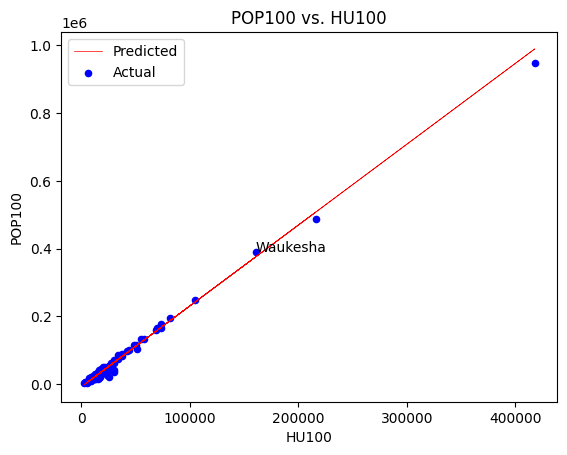

In [19]:
#Q12
fig, ax = plt.subplots()

x = counties.set_index('NAME')['HU100'].loc['Waukesha County']
y = counties.set_index('NAME')['POP100'].loc['Waukesha County']

# PLOT HERE
counties['Predicted_POP_by_HU'] = model_HU100.predict(counties[['HU100']])
counties.plot.line(ax=ax, x='HU100', y='Predicted_POP_by_HU',color = 'red',linewidth=0.5,label="Predicted")
counties.plot.scatter(ax=ax, x='HU100', y='POP100',color = 'blue',label = "Actual")
ax.legend()
ax.set_title('POP100 vs. HU100')
plt.text(x,y,s='Waukesha')
# IMPORTANT -- Do not remove -- 
with open("Q12.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()

## Part 3: Land Use Features

### Q13: How many numbers in matrix `A` are between 1 and 4 (inclusive)?

The matrix `A` is provided below

**Note:** If you use numpy, make sure to cast the final answer to an `int`.

In [20]:
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

In [21]:
#Q13
int(sum((A>=1)&(A<=4)).sum())

13


### Q14: How does Dane County look?

**Note:** in lab, you had to use TIGERweb to get the geodata.  You
**shouldn't** do that here because we already did that saved the results
to `counties.geojson`, which you should use.  Otherwise, this is very
similar to the lab exercise.

You can get the matrix for Dane County using `rasterio` and using the geometry in the DataFrame from `counties.geojson`. You can open a file inside zip by running the command `rasterio.open("zip://./land.zip!/wi.tif")`.

**Note:** Use the color map provided below.

<img src="img/q14.png" width="400">

In [22]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

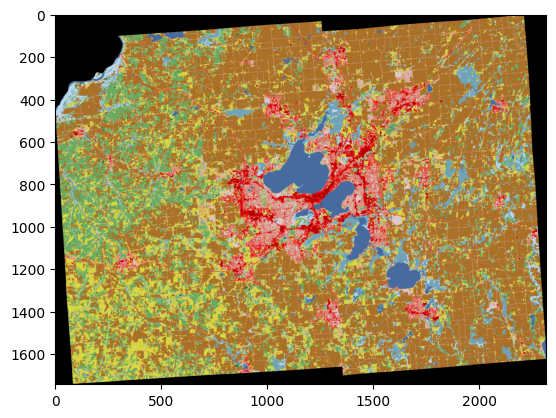

In [23]:
#Q14
fig, ax = plt.subplots()

# WRITE CODE HERE
land = rasterio.open("zip:land.zip!wi.tif")

counties2 = gpd.read_file('counties.geojson')
dane = counties2[counties2['NAME'] == 'Dane County']

# dane.plot()

from rasterio.mask import mask
matrix, _ = mask(land, dane.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

ax.imshow(matrix, cmap=custom_cmap, vmin=0, vmax=255)

# IMPORTANT -- Do not remove -- 
with open("Q14.pkl", "wb") as f:
    pickle.dump(fig, f)

### Q15: What portion of Dane County is "Crops"?

Be careful!  Not everything in the matrix is Dane County -- cells with value 0 relate to land of other counties and should not be counted.

You can lookup the numeric code for "Crops" and other types here: https://www.mrlc.gov/data/legends/national-land-cover-database-2019-nlcd2019-legend

For your convenience, we have provided the numeric codes below.

**Note:** Make sure to cast the final answer to a `float`.

In [24]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [25]:
#Q15
float(((matrix!= 0)& (matrix == 82)).sum()/(matrix!= 0).sum())

0.46705544316564085

### Q16: What is the Relationship Between POP100 and `open_water` cells?

Show a scatter plot where each point corresponds to a county.

**_Make sure to include axis labels_**

**Important:** Make sure to pass in `ax` as an argument when plotting: `.plot.scatter(ax=ax, ...)`

<img src="img/q16.png" width="400">

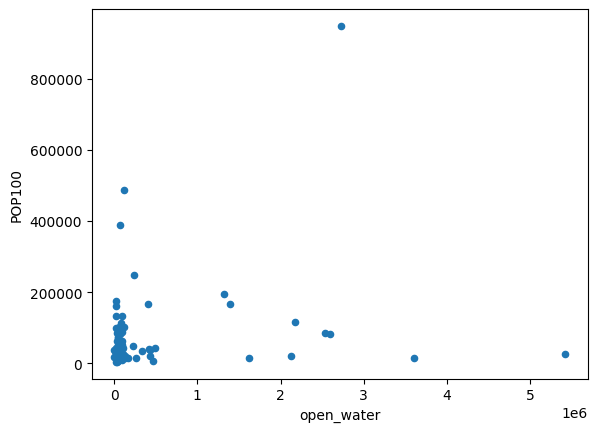

In [26]:
#Q16
fig, ax = plt.subplots()

# First we need to count each county's number of open water cells
counties2 = counties2.to_crs(land.crs)  

counties2['open_water'] = 0.0

for i in range(len(counties2)):
    current_geom = [counties2.iloc[i].geometry.__geo_interface__]  # Geometry in list of geojson-style dicts
    matrix, _ = mask(land, current_geom, crop=True)
    matrix = matrix[0]  # Take the first band
    open_water_pixels = float((matrix == 11).sum())
    counties.at[i, 'open_water'] = open_water_pixels 
# PLOT HERE
counties.plot.scatter(ax=ax,x='open_water',y='POP100')

# IMPORTANT -- Do not remove -- 
with open("Q16.pkl", "wb") as f:
    pickle.dump(fig, f)

# Individual Part (25%)

For this portion of the machine project, you are only allowed to seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** receive help from anyone else.

For this part, you'll try to predict population on a **per-census
tract** basis (in contrast to our preceding per-county analysis),
using features calculated from the land use data. 

## Part 4: Feature Analysis
1. Start with a GeoDataFrame dataset loaded from `tracts.shp`.
2. Add feature columns to that dataset for every key in land_use(found under q14), with the column value being the number of units present of that land type, based on raster data from `lands.zip`.
**Important:** Computation takes considerable amount of time with raster data so try to minimize masking operations!
3. Split your GeoDataFrame into train/test using `random_state=320` and `test_size=0.20`.
4. Construct a regression model to predict POP100. Use all of the new columns you created in step 2 as the features for training.

In [27]:
# Part 1
tracts = gpd.read_file("tracts.shp")
tracts = tracts.to_crs(land.crs)
for land_type in land_use:
    tracts[land_type] = 0

for i,row in tracts.iterrows():
    try:
        matrix, _ = mask(land, [row.geometry.__geo_interface__], crop=True)
        matrix = matrix[0]
        
        for land_type, code in land_use.items():
            count = ((matrix == code) & (matrix != 0)).sum()
            tracts.at[i, land_type] = count
            
    except ValueError:
        for land_type in land_use:
             tracts.at[i, land_type] = 0

tracts.head()

,GEOID,POP100,geometry,open_water,ice_snow,developed_open,developed_low,developed_med,developed_high,barren,...,dwarf_scrub,shrub_scrub,grassland,sedge,lichens,moss,pasture,crops,woody_wetlands,herbacious_wetlands
0,55001950204,1646,"POLYGON ((476459.321 2359023.337, 476451.046 2...",55465,0,12351,5402,833,104,175,...,0,18518,33652,0,0,0,3136,73433,84766,20975
1,55009940002,4698,"POLYGON ((621899.492 2417088.085, 621887.848 2...",57,0,1456,2104,1211,243,229,...,0,23,38,0,0,0,770,1503,2317,123
2,55061990000,0,"POLYGON ((672119.958 2401253.56, 672233.404 24...",2107187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55009020100,5817,"POLYGON ((637138.41 2436942.838, 640613.785 24...",117008,0,6209,7738,1971,337,718,...,0,60,327,0,0,0,17419,112681,26017,2677
4,55009010100,6506,"POLYGON ((628917.973 2411150.565, 629625.11 24...",530,0,1141,2711,1109,174,2,...,0,0,52,0,0,0,23,2,79,47


In [28]:
train,test = train_test_split(tracts, test_size = 0.2, random_state= 320)
ycol = 'POP100'
xcols = [land_type for land_type in land_use]
lm = LinearRegression()
model_tracts = lm.fit(train[xcols],train[ycol])# trained model
model_tracts.coef_

array([-9.65318645e-04, -1.19348975e-15,  1.02738042e-01,  2.30138215e-01,
        1.52333843e+00, -1.02037339e+00, -3.79827445e-01, -3.98022457e-03,
       -1.96598028e-02, -6.33203447e-03,  2.22044605e-16,  6.58607763e-03,
       -4.01587694e-02, -5.55111512e-17,  2.22044605e-16,  0.00000000e+00,
       -1.09453453e-02, -7.03819484e-03, -2.53701933e-03, -1.37489419e-02])

### Q17: What features does your model rely on most?

Answer with a bar plot showing feature and coefficient of feature in our trained model.

Write a comment discussing what the graph is showing you and how you might use that 
information in building your own model

**Important:** Make sure to pass in `ax` as an argument when plotting: `.plot.bar(ax=ax)`

**This question is weighted to be worth 2 regular questions.**

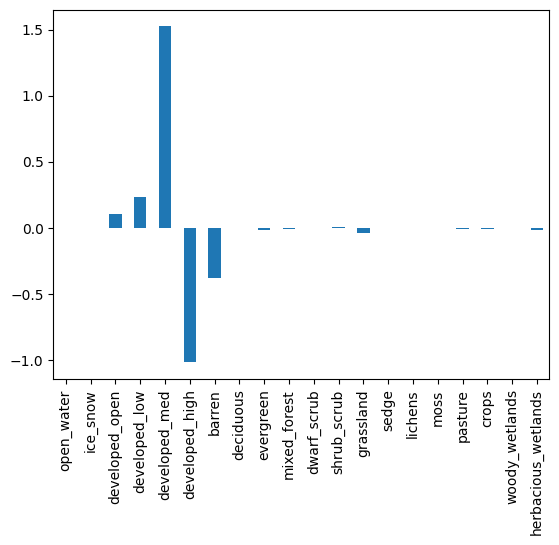

In [29]:
#Q17
fig, ax = plt.subplots()

# PLOT HERE
pd.Series(model_tracts.coef_, index=xcols).plot.bar(ax=ax)

# IMPORTANT -- Do not remove -- 
with open("Q17.pkl", "wb") as f:
    pickle.dump(fig, f)
    
plt.show()
# The plot says my model relies on 'developed_med' most. 

## Part 5: Model Creation and Analysis
1. Construct at least 2 regression models predicting POP100. They should differ in terms of (a) what columns they use and/or (b) whether or not they're preceded by transformers in an sklearn Pipeline
2. Perform cross validation on both of your models over your training dataset

In [30]:
# Part 2
# I will use the model_tracts as the first model, which is a multiple linear model
# We now create the second model using Pipeline. This model will include polynomial features

model2_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  
    ("scaler", StandardScaler()),                               
    ("regressor", LinearRegression())                           
])

### Q18: What is the mean and variance of the cross validation scores from both of your models?

Answer with a dictionary like this:
```
{
'model1-avg': 0.44286680823801083,
 'model1-std': 0.034903979417578036,
 'model2-avg': 0.4746679087375649,
 'model2-std': 0.033400327309278784
}
```

Write a comment recommending which model you recommend for this prediction task. Factors you **must** consider are (a) mean of cross validation scores is high, (b) variance of cross validation scores is low. Additional factors you might consider are (c) model is simple, and (d) anything else you think is important.

**Note:** Your values are likely to be different than those seen above, which is okay.
We are just checking if you return a dictionary for this question.

In [31]:
#Q18
scores1 = cross_val_score(lm,train[xcols], train[ycol], cv=5)
scores2 = cross_val_score(model2_pipeline,train[xcols], train[ycol], cv=5)

{
'model1-avg': float(scores1.mean()),
 'model1-std': float(scores1.std()),
 'model2-avg': float(scores2.mean()),
 'model2-std': float(scores1.std())
}

{'model1-avg': 0.515482407488663,
 'model1-std': 0.023980540400255622,
 'model2-avg': -3.1211567062340415,
 'model2-std': 0.023980540400255622}

<hr/>

#### I would recommend the multiple linear model we created in previous questions, since it had higher average score compared to the second one.

<hr/>

### Q19: How does your recommended model score against the test dataset?

Fit your recommended model to the train dataset and then score it using the test dataset.
Your model needs to achieve explained variance higher than 0.35 in order to receive full credit.

**This question is weighted to be worth 3 regular questions.**

In [32]:
#Q19
lm.fit(train[xcols], train[ycol])
lm.score(test[xcols], test[ycol])

0.3870945545628156